In [113]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of cities and their respective URLs
cities = {
    "Downtown Los Angeles": "https://www.laalmanac.com/weather/we08aa.php",
    "Beverly Hills": "https://www.laalmanac.com/weather/we143aa.php",
    "Burbank": "https://www.laalmanac.com/weather/we11aa.php",
    "Claremont": "https://www.laalmanac.com/weather/we142aa.php",
    "Hawthorne": "https://www.laalmanac.com/weather/we141aa.php",
    "Lancaster": "https://www.laalmanac.com/weather/we12aa.php",
    "Long Beach": "https://www.laalmanac.com/weather/we10aa.php",
    "Los Angeles International Airport": "https://www.laalmanac.com/weather/we09aa.php",
    "Palmdale": "https://www.laalmanac.com/weather/we131aa.php",
    "Pasadena": "https://www.laalmanac.com/weather/we131aa.php",
    "Sandberg": "https://www.laalmanac.com/weather/we132aa.php",
    "Santa Catalina Island": "https://www.laalmanac.com/weather/we133aa.php",
    "Santa Clarita": "https://www.laalmanac.com/weather/we134aa.php",
    "Santa Fe Dam (San Gabriel Valley)": "https://www.laalmanac.com/weather/we138aa.php",
    "Santa Monica": "https://www.laalmanac.com/weather/we139aa.php",
    "Torrance": "https://www.laalmanac.com/weather/we144aa.php",
    "Van Nuys, Los Angeles": "https://www.laalmanac.com/weather/we136aa.php",
    "Westwood, Los Angeles": "https://www.laalmanac.com/weather/we135aa.php",
    "Whittier": "https://www.laalmanac.com/weather/we140aa.php",
    "Woodland Hills, Los Angeles": "https://www.laalmanac.com/weather/we137aa.php"
}

# Initialize an empty list to store all data
all_data = []

# Define column names
columns = ["Location", "Season", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Season Total"]

# Loop through each city and its URL
for city, url in cities.items():
    print(f"Scraping data for {city}...")
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the table containing rainfall data
    table = soup.find("table")
    rows = table.find_all("tr")

    # Extract data from the table
    for row in rows:
        cells = row.find_all("td")
        if len(cells) > 0:  # Skip header rows
            season = cells[0].get_text(strip=True)  # First cell is the season (e.g., 2023-2024)
            monthly_data = [cell.get_text(strip=True) for cell in cells[1:]]
            all_data.append([city, season] + monthly_data)

# Convert the data into a DataFrame
df = pd.DataFrame(all_data, columns=columns)

Scraping data for Downtown Los Angeles...
Scraping data for Beverly Hills...
Scraping data for Burbank...
Scraping data for Claremont...
Scraping data for Hawthorne...
Scraping data for Lancaster...
Scraping data for Long Beach...
Scraping data for Los Angeles International Airport...
Scraping data for Palmdale...
Scraping data for Pasadena...
Scraping data for Sandberg...
Scraping data for Santa Catalina Island...
Scraping data for Santa Clarita...
Scraping data for Santa Fe Dam (San Gabriel Valley)...
Scraping data for Santa Monica...
Scraping data for Torrance...
Scraping data for Van Nuys, Los Angeles...
Scraping data for Westwood, Los Angeles...
Scraping data for Whittier...
Scraping data for Woodland Hills, Los Angeles...


In [207]:
#Replace 'T' (trace amounts) and '---' (missing data) with 0.00 or NaN
df.replace({"T": "0.00", "---": "NaN"}, inplace=True)

# Convert numerical columns to floats
for col in columns[2:]:  # Skip "Location" and "Season"
    df[col] = pd.to_numeric(df[col], errors="coerce")

filtered_rainfall = df[df['Season']!='Current Normals*']
#filter for last 6 months and eliminate current normals


In [215]:
filtered_rainfall = filtered_rainfall = df[df['Season']!='Current Normals*'] #to prevent data loss

ordered_rain = filtered_rainfall[filtered_rainfall.columns[2:8]].shift(1)

for i in filtered_rainfall.columns[2:8]:
    filtered_rainfall[i] = ordered_rain[i]

filtered_rainfall

def extract_year(col):
    return int(col.split('-')[1])

filtered_rainfall['Year'] = filtered_rainfall['Season'].apply(extract_year)


ordered_col=['Year', 'Jan'  ,  'Feb' ,  'Mar'  , 'Apr'  , 'May'  , 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
filtered_rainfall = filtered_rainfall[ordered_col]

filtered_rainfall = filtered_rainfall[(filtered_rainfall['Year']>1983) & (filtered_rainfall['Year']<2025)]


months = ordered_col[1:]
filtered_rainfall = filtered_rainfall.groupby('Year')[months].mean().sort_index(ascending=False)


In [216]:
filtered_rainfall['Total Rainfall'] = filtered_rainfall[months].sum(axis=1)

#calculate SPI
#SPI = (x-mu)/sigma
rain_mean = filtered_rainfall['Total Rainfall'].mean()
rain_std = filtered_rainfall['Total Rainfall'].std()

filtered_rainfall['SPI'] = (filtered_rainfall['Total Rainfall'] - rain_mean) / rain_std
filtered_rainfall = filtered_rainfall.reset_index()
filtered_rainfall#[filtered_rainfall.columns['Year',4:8]]


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total Rainfall,SPI
0,2024,1.802000,11.846500,4.004000,0.714500,0.130500,0.005500,0.000500,0.001000,0.006000,0.017500,0.073500,0.043000,18.644500,0.646859
1,2023,8.594211,5.651053,6.969500,0.154500,0.782500,0.085500,0.000000,3.826842,0.149474,0.027368,0.479474,2.911053,29.631474,2.188135
2,2022,0.101667,0.095000,1.353333,0.292778,0.021667,0.072778,0.000556,0.000000,0.458333,0.140000,1.806667,2.895000,7.237778,-0.953299
3,2021,1.604500,0.228500,1.103000,0.027500,0.029000,0.003684,0.083684,0.011000,0.024500,0.610500,0.333000,7.323000,11.381868,-0.371958
4,2020,0.221000,0.274000,4.110500,3.096000,0.158000,0.011000,0.000000,0.000000,0.001053,0.005000,0.116000,1.275500,9.268053,-0.668488
5,2019,6.067000,5.992500,2.330500,0.098500,1.104000,0.044500,0.006842,0.000000,0.029500,0.000500,2.154500,4.677000,22.505342,1.188466
6,2018,1.960000,0.255500,3.187500,0.041000,0.189000,0.001579,0.012105,0.000000,0.000526,0.493000,1.455000,2.288500,9.883711,-0.582123
7,2017,7.864500,4.340500,0.839500,0.134500,0.302000,0.007500,0.001500,0.070500,0.084500,0.018000,0.075500,0.004211,13.742711,-0.040774
8,2016,2.971000,0.662000,1.770500,0.666000,0.250000,0.004500,0.000000,0.000000,0.008000,0.357000,0.962500,3.745500,11.397000,-0.369835
9,2015,1.115000,0.631000,0.826500,0.164500,1.008000,0.030500,0.705000,0.000000,1.321500,0.305500,0.158500,0.765000,7.031000,-0.982307


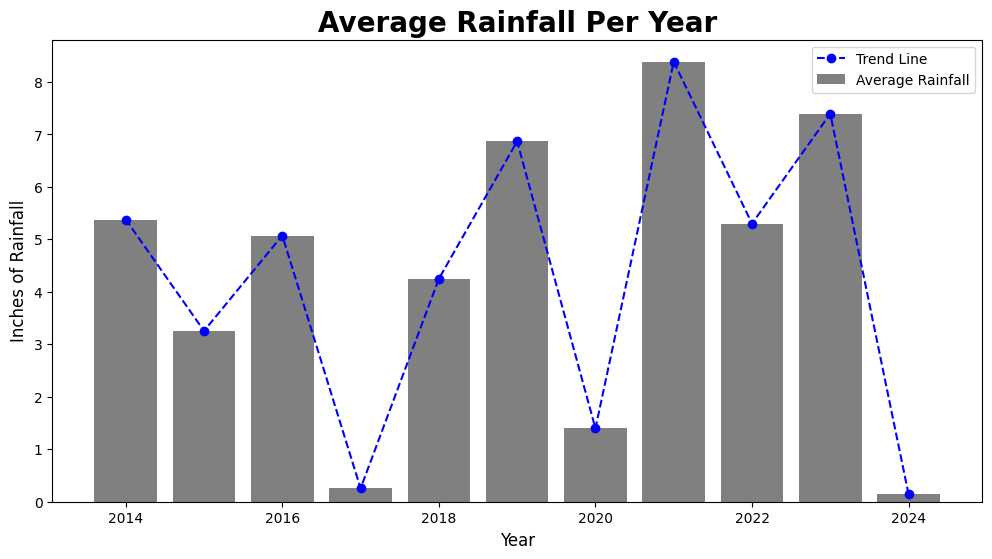

In [252]:

#Funtion operates where:
#  z: is a DataFrame 
#  months:  is a list of numbered months [1-12]
#  year: including data from year, onward

def graph_Yearly_Rain(z,months,year):
    z = filtered_rainfall[filtered_rainfall['Year'] >= year]
    years = z['Year']
    total_z = z[filtered_rainfall.columns[(months)]]
    total_z['Total Rainfall'] =total_z[total_z.columns].sum(axis=1)
    rainfall = total_z['Total Rainfall']

    fig, ax = plt.subplots(figsize=(12, 6))

    ax.bar(years, rainfall, color='grey', label='Average Rainfall')
    ax.plot(years, rainfall, color='blue', marker='o', linestyle='--', label='Trend Line')
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Inches of Rainfall', fontsize=12)
    ax.set_title('Average Rainfall Per Year', fontsize=20, fontweight='bold')
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    ax.legend()
    plt.show()

df = filtered_rainfall
months = [7,8,9,10,11,12]
year = 2014

graph_Yearly_Rain(df,months,year)


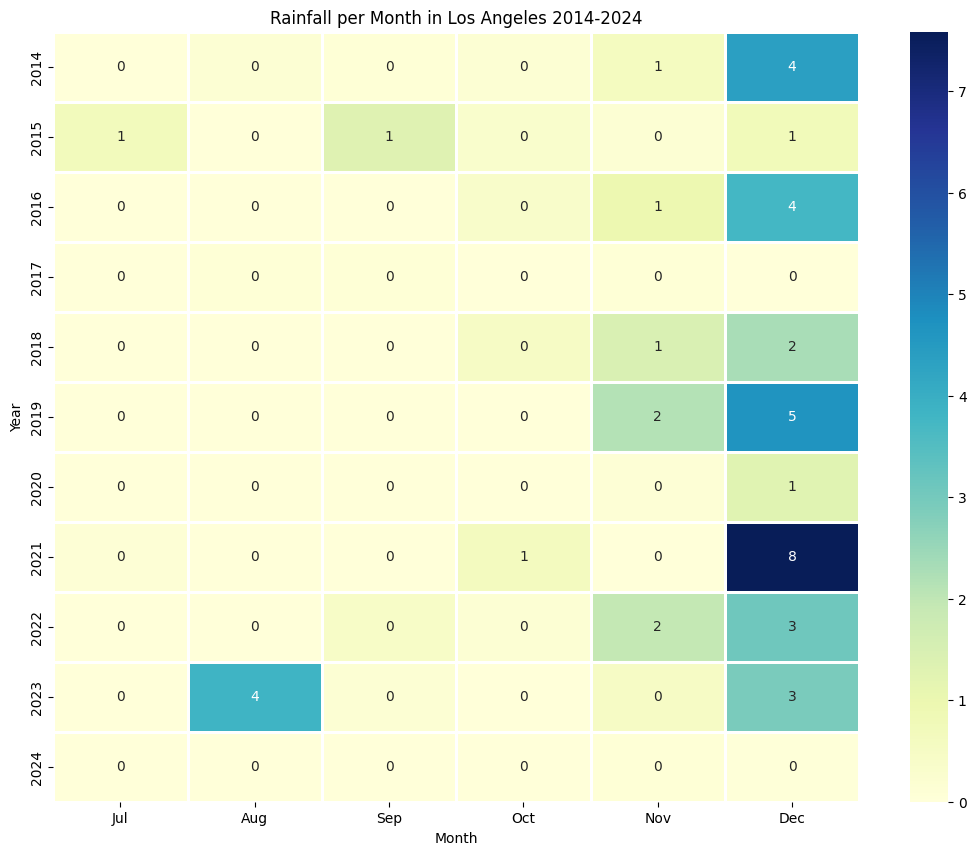

In [5]:
import seaborn as sns

plt.figure(figsize=(13, 10))
z = filtered_rainfall[filtered_rainfall['Year']>2013].set_index('Year').drop(columns=["Total Rainfall",'SPI'])
sns.heatmap(z, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.9)

plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Rainfall per Month in Los Angeles 2014-2024')
plt.show()

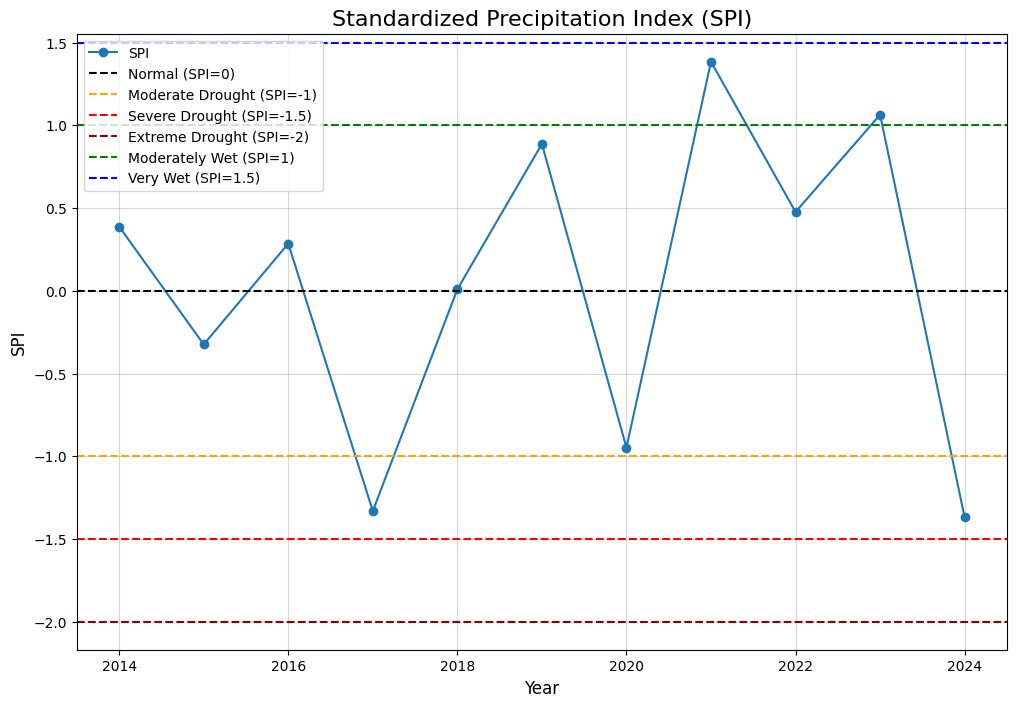

In [54]:
#SPI for 2014 -'24
#change "a" variable in line 5 to see all years

a = filtered_rainfall[['Year','SPI']][filtered_rainfall['Year']>2013]
plt.figure(figsize=(12, 8))
plt.plot(a['Year'], a['SPI'], marker='o', linestyle='-', label='SPI')
plt.axhline(0, color='black', linestyle='--', label='Normal (SPI=0)')
plt.axhline(-1, color='orange', linestyle='--', label='Moderate Drought (SPI=-1)')
plt.axhline(-1.5, color='red', linestyle='--', label='Severe Drought (SPI=-1.5)')
plt.axhline(-2, color='darkred', linestyle='--', label='Extreme Drought (SPI=-2)')
plt.axhline(1, color='green', linestyle='--', label='Moderately Wet (SPI=1)')
plt.axhline(1.5, color='blue', linestyle='--', label='Very Wet (SPI=1.5)')

plt.title('Standardized Precipitation Index (SPI)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('SPI', fontsize=12)

plt.legend()
plt.grid(True, alpha = .5)
plt.show()


In [26]:
filtered_rainfall.to_csv('spi_rainfall_data.csv', index=False)